==============================================================================================
# Practicum 5 - Part 1

==============================================================================================

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- The questions introduced in the exercises must be answered.

- Implemented code should be commented.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline: December 6th, 23:00 h**


==============================================================================================
##  Image search using textures
==============================================================================================

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.

The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture 
- Distance between images and similarity search


### Imports

In [1]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters , img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize
from scipy.ndimage import convolve

import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1 Derivative of Gaussians aka Leung-Malik (LM) Filter Bank
We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Derivative-of-Gaussians or as known as Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


We import Leung-Malik filters as follows:

In [2]:
import LM_filters
filter_bank = LM_filters.makeLMfilters()

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


### Plotting all filters

Plot the created filters as images similar to the figure above.

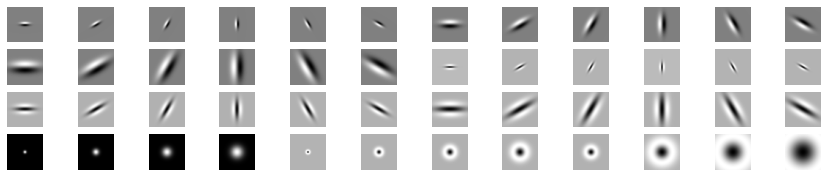

In [3]:
# Your solution here
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1

What are the different filters? Which is the size of the filters? How many filters there are?

In [4]:
# Your solution here
print('number of filtres: ' ,filter_bank.shape[-1])
print('size of filters: ' ,filter_bank[1].shape)

number of filtres:  48
size of filters:  (49, 48)


## 1. Extracting a feature vector for an image

**1.1** Read the image ``/images/pizza.jpg``, and resize it to 240𝑥240 pixels. Then, convert the image to grayscale and visualize both, the RGB and the grayscale images.

In [9]:
def show_images(m, n, imgs, labels):
    fig, axes = plt.subplots(m, n, figsize=(13, 6))
    ax = axes.ravel()
    cmap='gray'
    for i in range(m*n):
        ax[i].imshow(imgs[i], cmap)
        ax[i].set_title(labels[i])
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'grayscaled')

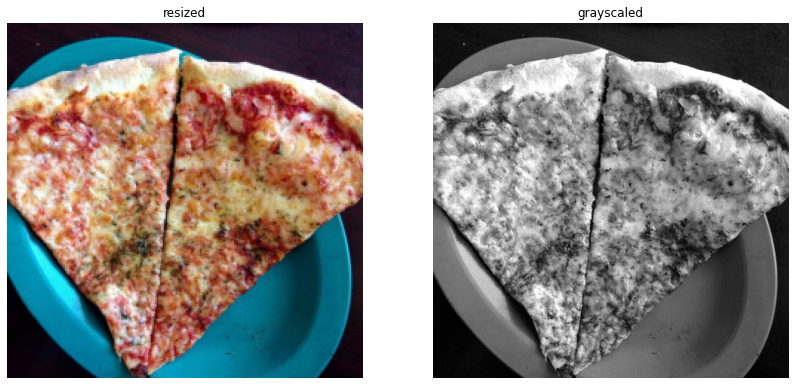

In [5]:
# Your solution here
from skimage import io

img = io.imread('images/pizza.jpg')
imgrsz = resize(img, (240,240))
pizza_gray = rgb2gray(img)

fig, axs = plt.subplots(ncols=2,figsize=(14,9))

ax = axs[0]
ax.imshow(imgrsz)
ax.axis('off')
ax.set_title('resized')

ax = axs[1]
ax.imshow(pizza_gray, cmap='gray')
ax.axis('off')
ax.set_title('grayscaled')


**1.2** Given $D=n\_{filters}$ filters from the filter bank and a single image `image`, make a function `get_image_features(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$

Try the function with the previous image and print the feature vector.

**Hint**: The function should return a feature vector obtained by averaging each filter response on the image. Use a small number of filters to try your functions

In [6]:
# Your solution here

def get_image_features(image, filter_bank, n_filters):
      
    # Image rescaled, it's faster and makes no difference at all.
    r_image = skimage.transform.rescale(image, 0.5)
    # Convolve the gray-scaled image with each filter in the bank
    for i in range(n_filters):
        features = scipy.ndimage.convolve(r_image, filter_bank[:, :, i]) 
    # mean of each features
    return [np.mean(i) for i in features]



In [7]:
## Try the function
n_filters = 5
im_features = get_image_features(pizza_gray, filter_bank, n_filters)


**1.3** (Optional) Try ``extract_features()`` using a different number of filters and other images (for instance ``/images/dog.jpg`` or ``/images/flower.jpg``)


In [8]:
# Your solution here
doggo = io.imread('images/dog.jpg')
doggo = rgb2gray(doggo)
n_filters = 7
im_features = get_image_features(doggo, filter_bank, n_filters)
print(im_features[0])

-0.0001685286767965738


### Visualizing features

**1.3** Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png" >

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

In [9]:
# Your solution here
def visualize_features(im,  filter_bank, n_filters=5):
    
    fig, axs = plt.subplots(ncols=n_filters, nrows=2, figsize=(15,6))
    # Convolve images with the filters.
    images = [scipy.ndimage.convolve(im, filter_bank[:,:, i]) for i in range(n_filters)]
    
    # Show in first row the convolved images and in the second one the filters used in each convolsion.
    for i in range(n_filters):
        axs[0][i].axis('off')
        axs[0][i].imshow(images[i], cmap='gray')
        axs[1][i].axis('off')
        axs[1][i].imshow(filter_bank[:, :, i], cmap='gray')

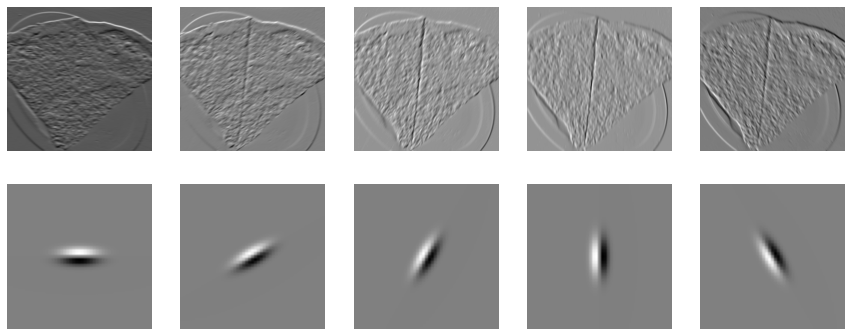

In [10]:
## Try the function
visualize_features(pizza_gray, filter_bank)

**1.4** (Optional) Try ``visualize_filters()`` using a different number of filters and using another image (for instance ``/images/dog.jpg`` or ``/images/flower.jpg``)

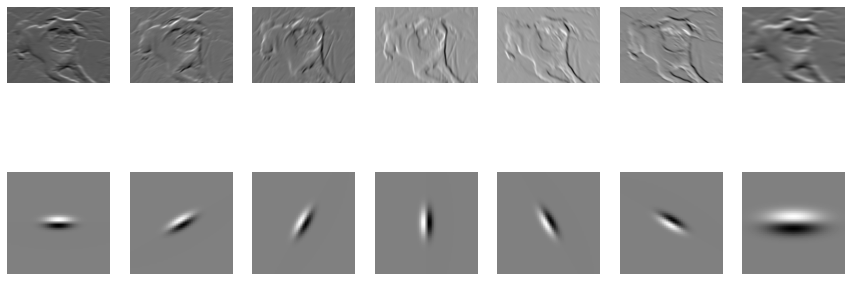

In [11]:
# Your solution here
doggo = io.imread('images/dog.jpg')
doggo = rgb2gray(doggo)
visualize_features(doggo, filter_bank, 7)

## 2 Load & resize the dataset

**2.1** Read all the images in the directories, resize them to 240x240 pixels and save the image in an array:

<ul>
    <li>./images/pizza/</li>
    <li>./images/flowers/</li>
    <li>./images/pets/</li>
</ul>

**Hint:** You have to create an array for each directory, which containts all the images belonging to that path.

In [13]:
# Your solution here
def load_resize(path):
    collection = os.listdir(path)
    imgs = []
    for file in collection:
        img = imread(path + file)
        img = rgb2gray(img)
        img = img_as_ubyte(img)
        img = resize(img, (240,240))
        imgs.append(img)
        
    return imgs



In [14]:
# Your solution here
pizza_images = load_resize("./images/pizza/")
flowers_images = load_resize("./images/flowers/")
pets_images = load_resize("./images/pets/")

Visualize one image (the first) from each array. Use ``subplot`` to create a 3x1figure.

How many images there are in each directory?

Text(0.5, 1.0, '1st pic pets')

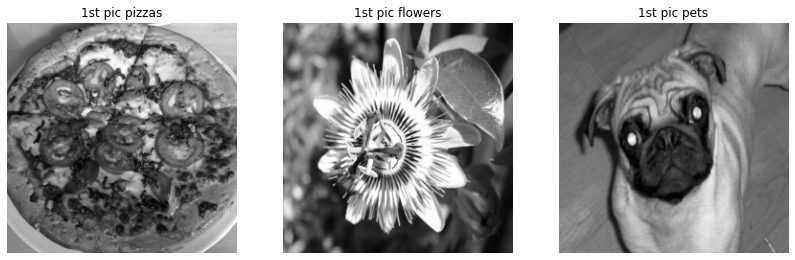

In [15]:

fig, axs = plt.subplots(ncols=3,figsize=(14,9))

ax = axs[0]
ax.imshow(pizza_images[0], cmap='gray')
ax.axis('off')
ax.set_title('1st pic pizzas')

ax = axs[1]
ax.imshow(flowers_images[0], cmap='gray')
ax.axis('off')
ax.set_title('1st pic flowers')

ax = axs[2]
ax.imshow(pets_images[0], cmap='gray')
ax.axis('off')
ax.set_title('1st pic pets')

In [16]:
print(len(pizza_images))
print(len(flowers_images))
print(len(pets_images))

30
29
29


### Constructing the matrix of the feature vectors for all images

**2.2** Implement a function `get_dataset_features(all_images, filter_bank, n_filters=6)` that applies `extract_features` to get a feature vector for each of the images in the union of the three datasets (fish and chips_images, pizza, paella). It must return a matrix containing at row $k$ feature vector for the input image $k$.

Try the function with the whole data set:

*all_images = pizza_images + flowers_images + pets_images*

In [20]:
# Your solution here
from scipy.ndimage import convolve
def extract_features(image, filter_bank, n_filters):
    features = np.zeros(n_filters)
    for f in range (n_filters):
        filtro = filter_bank[:,:,f]
        result = abs(convolve(image, filtro))
        features[f] = result.mean()
    return features

def get_dataset_features(all_images,  filter_bank, n_filters=filter_bank.shape[2]):
    n_images = len(all_images)
    feature_vectors=np.zeros((n_images,n_filters))
    i = 0
    print("Extracting features of image:")
    for img in all_images:
        features = extract_features(img, filter_bank, n_filters)
        feature_vectors[i] = features
        print(i, end='...')
        i += 1
    
    return feature_vectors

In [21]:
# Your solution here
pizza_images = load_resize("./images/pizza/")
flowers_images = load_resize("./images/flowers/")
pets_images = load_resize("./images/pets/")

In [22]:
## Try the function
all_images = pizza_images + flowers_images + pets_images
feature_vectors=get_dataset_features(all_images,  filter_bank, 12)

Extracting features of image:
0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...

**2.3** Print the shape of `feature_vectors` as well as the features for image #3 (*i.e. all_images[3]*), image #33, and image #53, directly from the vector

In [23]:
# Your solution here
print(feature_vectors.shape)
print(feature_vectors[3])
print(feature_vectors[33])
print(feature_vectors[53])


(88, 12)
[0.01560805 0.01422859 0.01176034 0.01035339 0.01114999 0.01435539
 0.01025854 0.00930197 0.00723439 0.00620856 0.00685179 0.00918259]
[0.00907189 0.00942618 0.01046626 0.01102429 0.01042695 0.00945168
 0.00510167 0.00504824 0.00554585 0.00601555 0.00584777 0.00554625]
[0.01122717 0.01211497 0.01379419 0.01438286 0.01317577 0.01182635
 0.00754022 0.00829614 0.00931856 0.00973053 0.00883014 0.00771386]


### Visualizing the features of an image

**2.4** Define a function `visualize_features(im_index, feature_vector)` that given three different images, plots their features. Use different colors (red, green, and blue) to distinguish the features of each image.
Choose 3 images on your choice and visualize the results.

In [26]:
# Your solution here
def visualize_features(im_index, feature_vector):
    # Define data values
    x = np.arange(0, 0.02, 0.02/12, dtype=float)
    y = feature_vector[im_index[0]]
    z = feature_vector[im_index[1]]
    k = feature_vector[im_index[2]]
    # Plot a simple line chart
    plt.plot(x, y, 'g', label='image '+str(im_index[0]))

    plt.plot(x, z, 'r', label='image '+str(im_index[1]))

    plt.plot(x, k, 'b', label='image '+str(im_index[2]))



    plt.legend()
    plt.show()

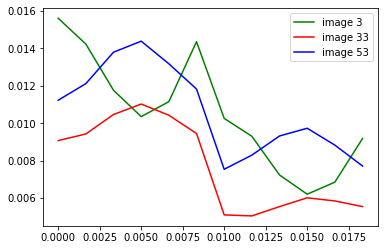

In [27]:
## Try the function
visualize_features( [3,33,53] , feature_vectors)

**2.5** (Optional) Try the function using a different set of images

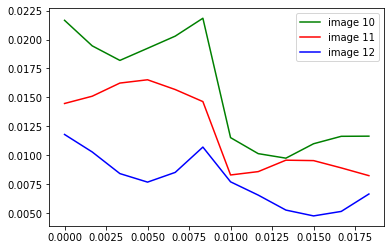

In [28]:
# Your solution here
visualize_features( [10,11,12] , feature_vectors)

Explain which features are most important to a given image and with each derivatives are related.


# 3 Retrieving the most similar images

### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$



**3.1** Implement a function `retrieve_images(im_features, feature_vectors, k=5)` to retrieve and visualize the `k` most similar images (according to the l2 norm) to `im` and the corresponding distances.

The input of this function need to be feature of the image of interest `im_features`, the whole data set features `feature_vectors`, and an integer value `k`, which defines the number of images.

The function should return the ordered vector of distances and the index of the closests images.

In [45]:
# Your solution here
def retrieve_images(im, all_images, feature_vectors, k=5, n_features = 12): # N_features has to be the same to model
    dist_and_img = []
    # Extract features for model image
    gray_image = rgb2gray(im)
    gray_image = img_as_ubyte(gray_image)
    reduced_image = resize(gray_image, (250,250))
    features = get_image_features(reduced_image, filter_bank, n_features) # Features setted to model to reduce comp
    
    # Calculate distances between the model and the features for each image
    for i in range(len(all_images)):
        # Apply L2 norm between features
        dist = np.linalg.norm(feature_vectors[i] - features)  
        dist_and_img.append((dist, all_images[i]))
    
    # Sort list by distance
    dist_and_img.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_and_img][:k]
    closest = [l[1] for l in dist_and_img][:k]
    
    return closest, distances

Try your function using ``/images/pizza.jpg``.

In [46]:
# Try your function
pizza = imread('./images/pizza.jpg')
closest, distances = retrieve_images(pizza, all_images, feature_vectors, k=5)

**3.2** Write a function *show_closest_images(all_images, closest, distances)* to show the closest images and the corresponding distances. 

<img src="./images/indice.png" >


In [68]:
def show_closest_images(all_images, imgs, labels):
    fig, axes = plt.subplots(1, len(closest), figsize=(13, 6))
    ax = axes.ravel()
    cmap='gray'
    for i in range(len(closest)):
        ax[i].imshow(imgs[i], cmap)
        ax[i].set_title("Distance: " + "{0:.4f}".format(labels[i]))
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

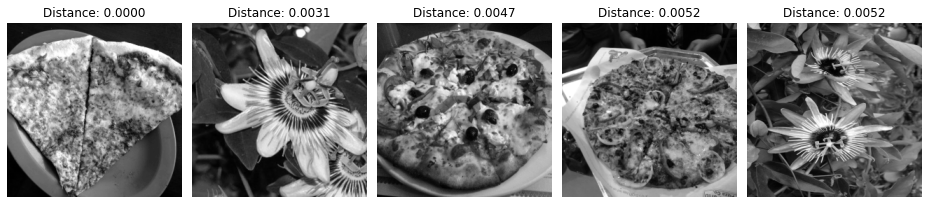

In [69]:
show_closest_images(all_images, closest, distances)

**3.3** Try your function using a different number of closest images `k`.

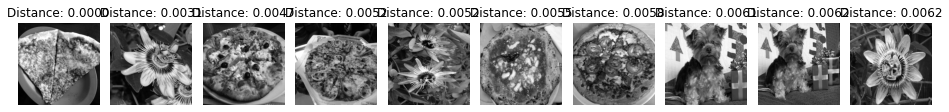

In [70]:
# Your solution here
closest, distances = retrieve_images(pizza, all_images, feature_vectors, k=10)
show_closest_images(all_images, closest, distances)

**3.4** (Optional) Try your function using ``/images/dog.jpg``, and ``/images/flower.jpg``

In [ ]:
# Your solution here

# 4 Compute the accuracy of the algorithm: given a query image. 

**4.1** Implement a function `accuracy(feature_vectors, class_labels, im_features, class_im,  k=5)`, which takes as input `feature_vectors`, the `class_labels` for the images (`0 = pizza`, `1 = flower` and `2 = pet`), the number of images to retrieve `k`, a query image (i.e. the feature vector for the image of interest) and the class of the query image `class_im`. 

Returns as output the number of retrieved images that belong to class `class_im` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: Be careful to exclude the query image from the retrieved images (i.e. those cases in which `distance=0.0`)

In [71]:
# Your solution here
class_labels = np.concatenate((np.zeros(30), np.ones(28),  2*np.ones(29))).reshape(87,1)

def accuracy(feature_vectors, class_labels, im_features, class_im, k=5):
    ## Complete this function
    dist_img_pos = []
    # Calculate distances between the model and the features for each image
    for i in range(len(feature_vectors)):
        # Apply L2 norm between features
        dist = np.linalg.norm(feature_vectors[i] - im_features)  
        dist_img_pos.append((dist, all_images[i], i))
    
    # Sort list by distance
    dist_img_pos.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_img_pos][:k]
    closest = [l[1] for l in dist_img_pos][:k]
    pos = [l[2] for l in dist_img_pos][:k]
    
    # Remove img with distance equals to 0 (query image), if found
    dist = np.array(distances)
    indice = np.where(dist == 0)
    if  np.size(indice) != 0:
        dist = np.delete(dist, indice)
        k -= 1
        class_labels = np.delete(class_labels, indice)
    
    # Count number of hits
    count = 0
    for p in pos:
        if class_labels[p] == class_im: count +=1 
    return count/(k)

In [73]:
# Read and transform image
im = imread('./images/pizza.jpg')
gray_image = rgb2gray(im)
gray_image = img_as_ubyte(gray_image)
reduced_image = resize(gray_image, (250,250))

# Get the features
im_features = extract_features(reduced_image, filter_bank, 12)
# Try your function
class_im = 0 # pizza

In [74]:
print("acc: {:.2%}".format(accuracy(feature_vectors, class_labels, im_features, class_im, k=5)))

acc: 75.00%


Compute the accuracy with k=10 with the previous images. Does the accuracy match the images retrieved from the previous exercise?

In [115]:
# Get the features
im_features = extract_features(reduced_image, filter_bank, 12)
# Try your function
class_im = 0 # pizza
print("acc: {:.2%}".format(accuracy(feature_vectors, class_labels, im_features, class_im, k=10)))

RuntimeError: filter weights array has incorrect shape.

**4.2** (Optional) Try your function using other images and modifying the number of filters to be used.

**Hint:** You can use `im_features = feature_vectors[j]` and `class_im = class_labels[j]`, for a given `j` value, in order to simplify the problem, instead of recomputing the features for a new image. **Remember** to exclude the query image from the retrieved images!.

In [ ]:
# Your solution here

### Feature normalization

**4.3** As you can see in exercise 2.4, some features are higher than the rest and, therefore, they are "more important" during the image retrieving.

Normalize each feature between **[0,1]** using the minimum and the maximum values obtained from `feature_vectors`. Note that we need to use these values to normalize `im_features`.

Plot the new features of an image, using `visualize_features()`. Then, show the 5 closest images from `im_features` and compute the accuracy. Is there any difference? Do we obtain the same images than previously?

In [ ]:
# Your solution here

In [75]:
print("acc:", accuracy(new_im_features, 0, new_feature_vectors, class_labels, k=5))


NameError: name 'new_im_features' is not defined

# 5 Image retrieval based on texture and color. 

**5.1** Make a function ` lm_features_rgb(rgb_image, n_bins=12)`  that returns the features based on a color descriptor (using histograms, as it was performed in the **Deliverable 3 - video segmentation**). 

**Hint:** How will you define it? What should be the dimensonality of the new descriptor?.

In [82]:
# Your solution here
def load_resize_rgb(path):
    collection = os.listdir(path)
    imgs = []
    for file in collection:
        img = imread(path + file)
        img = img_as_ubyte(img)
        img = resize(img, (250,250))
        imgs.append(img)
        
    return imgs

def lm_features_rgb(image, n=LM_filters.makeLMfilters().shape[-1]):
    # We define the matrix
    features_for_im = np.zeros(3*n)
    
    # Extract the features of every channel of the image
    r = extract_features(image[:,:,0], LM_filters.makeLMfilters(), n)
    g = extract_features(image[:,:,1], LM_filters.makeLMfilters(), n)
    b = extract_features(image[:,:,2], LM_filters.makeLMfilters(), n)
    
    # And concatenate them
    features_for_im = np.concatenate((r, g, b))
        
    return features_for_im

In [84]:
# Try your function
lm_rgb_features = lm_features_rgb(pizza)
print(len(lm_rgb_features))

pizza_images = load_resize_rgb("./images/pizza/")
flowers_images = load_resize_rgb("./images/flowers/")
pets_images = load_resize_rgb("./images/pets/")
all_images = pizza_images + flowers_images + pets_images

# Apply lm_features
lm_rgb_features = lm_features_rgb(all_images[0], n=6) # 6 filters only
print(lm_rgb_features.shape)

144
(18,)



## Apply the function to all the images in the dataset

**5.2** Using ` lm_features_rgb` build the features of all the datapoints in and save them in `lm_dataset_features`.

**Hint:** You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [ ]:
%%time 
'''
Solution
'''

def features_all_images(all_images, filter_bank, n_f=filter_bank.shape[-1]):
    n_i = len(all_images)
    imgs = np.zeros((n_i,n_f*3))
    
    # For every image we extract the features based on a color descriptor
    print("Extracting features of image:")
    for i in range(0,n_i):
        imgs[i] = lm_features_rgb(all_images[i], filter_bank, n_f)
        print(i, end='...')

    # Finally, we return the result
    return imgs

X_lm_rgb = features_all_images(all_images, filter_bank, n_f=6) # 6 filters only
np.save('xlmrgb.npy',X_lm_rgb)

In [85]:
import joblib
X_lm_rgb = joblib.Parallel(n_jobs=8)(joblib.delayed(lm_features_rgb)(im) for im in all_images)

## Compute the accuracy of the method using lm rgb features

**5.3** Compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

Is the accuracy higher? Please, comment the results.

In [86]:
# Your solution here
def accuracy_rgb(X_lm_rgb, class_labels, im_features, class_im, k=5):
    ## Complete this function
    dist_img_pos = []
    # Calculate distances between the model and the features for each image
    for i in range(len(X_lm_rgb)):
        # Apply L2 norm between features
        dist = np.linalg.norm(X_lm_rgb[i] - im_features)  
        dist_img_pos.append((dist, all_images[i], i))
    
    # Sort list by distance
    dist_img_pos.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_img_pos][:k]
    closest = [l[1] for l in dist_img_pos][:k]
    pos = [l[2] for l in dist_img_pos][:k]
    
    # Remove img with distance equals to 0 (query image), if found
    dist = np.array(distances)
    indice = np.where(dist == 0)
    if  np.size(indice) != 0:
        dist = np.delete(dist, indice)
        k -= 1
        class_labels = np.delete(class_labels, indice)
    
    # Count number of hits
    count = 0
    for p in pos:
        if class_labels[p] == class_im: count +=1 
    return count/(k)   

In [89]:
# Test RGB accuracy
im = imread('./images/pizza.jpg')
reduced_image = resize(im, (250,250))

im_features = lm_features_rgb(reduced_image)
class_im = 0 # pizza
print("acc RGB: {:.2%}".format(accuracy_rgb(X_lm_rgb, class_labels, im_features, class_im, k=5)))

acc RGB: 75.00%


R: Yes, the accuracy is higher than the obtained on the previous exercise (gray image).

## Compare the accuracy of the method using a) texture, b) color and c) texture + color  features

**5.4** Compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

Is the accuracy higher? Please, comment the results.

In [95]:
def retrieve_images_rgb(im, all_images, feature_vectors, k=5, n_features = 6): # N_features has to be the same to model
    dist_and_img = []
    # Extract features for model image
    reduced_image = resize(im, (250,250))
    features = lm_features_rgb(reduced_image) # Features setted to model to reduce comp
    
    # Calculate distances between the model and the features for each image
    for i in range(len(all_images)):
        # Apply L2 norm between features
        dist = np.linalg.norm(feature_vectors[i] - features)  
        dist_and_img.append((dist, all_images[i]))
    
    # Sort list by distance
    dist_and_img.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_and_img][:k]
    closest = [l[1] for l in dist_and_img][:k]
    
    return closest, distances

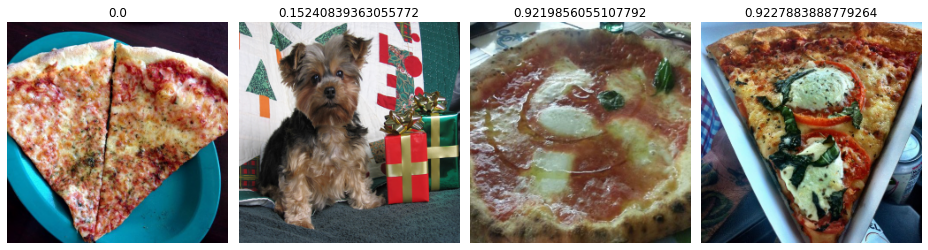

In [96]:
# Show 4 closest images (including the model)
pizza = imread('./images/pizza.jpg')
closest, distances = retrieve_images_rgb(pizza, all_images, X_lm_rgb, k=5)
show_images(1, 4, closest, distances)

R: Yes, the accuracy is higher than the obtained on the previous exercise (gray image).

**5.5** Compute the accuracy of the retrieved images using the features that contain texture and color information. Make a plot of the 4 closest images to the query images in the `lm_rgb_texture` space.

Is the accuracy higher? Please, comment the results.

In [112]:
def lm_rgb_texture(im, all_images, feature_vectors, k=5, n_features = 6): # N_features has to be the same to model
    dist_and_img = []
    # Extract features for model image
    gray_image = rgb2gray(im)
    gray_image = img_as_ubyte(gray_image)
    reduced_image_gray = resize(gray_image, (250,250))
    reduced_image_rgb = resize(im, (250,250))
    
    features = get_image_features(reduced_image_gray, filter_bank, n_features)
    features = np.concatenate((features, lm_features_rgb(reduced_image_rgb, n_features)))
    
    # Calculate distances between the model and the features for each image
    for i in range(len(all_images)):
        # Apply L2 norm between features
        dist = np.linalg.norm(feature_vectors[i] - features)  
        dist_and_img.append((dist, all_images[i]))
    
    # Sort list by distance
    dist_and_img.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_and_img][:k]
    closest = [l[1] for l in dist_and_img][:k]
    
    return closest, distances

In [113]:
# Retrieve feature vectors of gray images
pizza_images = load_resize("./images/pizza/")
flowers_images = load_resize("./images/flowers/")
pets_images = load_resize("./images/pets/")
## Try the function
all_images = pizza_images + flowers_images + pets_images
feature_vectors=get_dataset_features(all_images, 6) # Reduces computation time

Extracting features of image:


TypeError: 'int' object is not subscriptable

In [ ]:
# Show 4 closest images (including the model)
pizza = imread('./images/pizza.jpg')
closest, distances = lm_rgb_texture(pizza, all_images, np.concatenate((feature_vectors, X_lm_rgb), axis=1), k=5)                               
show_images(1, 4, closest, distances)

In [ ]:
def accuracy_rgb_texture(feature_vectors, class_labels, im_features, class_im, k=5):
    ## Complete this function
    dist_img_pos = []
    # Calculate distances between the model and the features for each image
    for i in range(len(feature_vectors)):
        # Apply L2 norm between features
        dist = np.linalg.norm(feature_vectors[i] - im_features)  
        dist_img_pos.append((dist, all_images[i], i))
    
    # Sort list by distance
    dist_img_pos.sort(key=lambda x:x[0])
    distances = [l[0] for l in dist_img_pos][:k]
    closest = [l[1] for l in dist_img_pos][:k]
    pos = [l[2] for l in dist_img_pos][:k]
    
    # Remove img with distance equals to 0 (query image), if found
    dist = np.array(distances)
    indice = np.where(dist == 0)
    if  np.size(indice) != 0:
        dist = np.delete(dist, indice)
        k -= 1
        class_labels = np.delete(class_labels, indice)
    
    # Count number of hits
    count = 0
    for p in pos:
        if class_labels[p] == class_im: count +=1 
    return count/(k)   

In [114]:
# Get accuracy based on texture + RGB features
im = imread('./images/pizza.jpg')
gray_image = rgb2gray(im)
gray_image = img_as_ubyte(gray_image)
reduced_image_gray = resize(gray_image, (250,250))
reduced_image_rgb = resize(im, (250,250))

features = get_image_features(reduced_image_gray, filter_bank, 6)
features = np.concatenate((features, lm_features_rgb(reduced_image_rgb)))
class_im = 0 # pizza
print("acc texture + RGB: {:.2%}".format(accuracy_rgb_texture(np.concatenate((feature_vectors, X_lm_rgb), axis=1),
                                                              class_labels, features, class_im, k=5)))

ValueError: operands could not be broadcast together with shapes (156,) (150,) 

R: The accuracy is equal to the accuracy found at the previous exercise (RGB features). But this could happen because we are using only 6 of 48 filters and taking to account only the five closest images. As we increase the number of filters or/and closest images, the accuracy should be higher.